In [ ]:
%load_ext rpy2.ipython

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

##Hito 3: Spotify Top 200

Valeria C. Zúñiga, Tomás Marchessi, Joaquin Salas, Sebastián Valdivia y Esteban Courard
Fecha de Realizacion: Noviembre 2021

##Motivación

La música ha estado presente en la vida de todas las personas y desde los inicios de la música han habido canciones más populares que otras. En la actualidad, gracias al avance de distintas tecnologías es posible ver de manera estadística cuáles son las canciones más populares.

Spotify es una plataforma de streaming musical que se ha hecho presente en la vida de muchas personas alrededor de todo el mundo y que su uso va en aumento. Esta plataforma lleva por lo menos 4 años realizando un chart con las 200 canciones más escuchadas a nivel mundial y por cada una de las distintas regiones presentes en Spotify (incluyendo Chile).

Durante la pandemia ha aumentado la necesidad de entretención, siendo la música una de las opciones entre las cuales uno podría entretenerse. Es por esto que nos gustaría estudiar el aumento en la cantidad de streaming pre y post pandemia, para luego estudiar las canciones más destacadas de este ranking, ver sus características (tales como los decibeles, los beat per minute, entre otros) y ver cómo estas propiedades afectan para que una canción sea popular.

## Exploración de Datos

Spotify actualiza cada 2 o 3 día los charts correspondiente a las canciones pertenecientes al top 200 y al viral 50. Ambos charts están catalogados tanto a nivel global, como por cada región que considera Spotify.

In [ ]:
%%R
spotifyChart <- read.csv("/content/drive/MyDrive/spotify-charts.csv" , encoding = "UTF-8")
topChile<- read.csv("topChile.csv" , encoding = "UTF-8")

Los dos dataset importados contienen la misma información, el segundo es tan solo un subconjunto del primero. Contiene tan solo la información correspondiente a la región de Chile. Ambos contienen el top 200 y el viral 50 con fechas desde el 1 de Abril de 2017 hasta el 31 de Julio de 2021.

### Descripción y limpieza del dataset

A continuación podemos ver las columnas que posee el dataset:

In [ ]:
%%R
head(spotifyChart)

                               title rank       date              artist
1 Despacito (Featuring Daddy Yankee)    1 2017-03-01          Luis Fonsi
2                          El Amante    2 2017-03-01           Nicky Jam
3         Reggaetón Lento (Bailemos)    3 2017-03-01                CNCO
4                       Shape of You    4 2017-03-01          Ed Sheeran
5            Chantaje (feat. Maluma)    5 2017-03-01             Shakira
6                 La Rompe Corazones    6 2017-03-01 Daddy Yankee, Ozuna
                                                    url    region  chart
1 https://open.spotify.com/track/4aWmUDTfIPGksMNLV2rQP2 Argentina top200
2 https://open.spotify.com/track/3umS4y3uQDkqekNjVpiRUs Argentina top200
3 https://open.spotify.com/track/3AEZUABDXNtecAOSC1qTfo Argentina top200
4 https://open.spotify.com/track/7qiZfU4dY1lWllzX7mPBI3 Argentina top200
5 https://open.spotify.com/track/6mICuAdrwEjh6Y6lroV2Kg Argentina top200
6 https://open.spotify.com/track/4okba5wu9mMLXx79DX

Podemos ver también las dimensiones del dataset:

In [ ]:
%%R
nrow(spotifyChart)

[1] 25512202


In [ ]:
%%R
ncol(spotifyChart)

[1] 9


Y un resumen del contenido de sus columnas:

In [ ]:
%%R
summary(spotifyChart)

    title                rank            date              artist         
 Length:25512202    Min.   :  1.00   Length:25512202    Length:25512202   
 Class :character   1st Qu.: 29.00   Class :character   Class :character  
 Mode  :character   Median : 67.00   Mode  :character   Mode  :character  
                    Mean   : 81.07                                        
                    3rd Qu.:131.00                                        
                    Max.   :200.00                                        
                                                                          
     url               region             chart              trend          
 Length:25512202    Length:25512202    Length:25512202    Length:25512202   
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
               

Realizamos una eliminación de NA’s y url’s ya que no aportan informacion para la exploracion. En este caso, las canciones del viral 50 son las que poseen valor NA, pero dado que nos importa estudiar el top 200, la eliminación de estos datos aporta positivamente.

In [ ]:
%%R
spotifyChart <- na.omit(spotifyChart[c(1,2,3,4,6,7,9)])
topChile <- na.omit(topChile)

In [ ]:
%%R
summary(spotifyChart)

    title                rank            date              artist         
 Length:19873403    Min.   :  1.00   Length:19873403    Length:19873403   
 Class :character   1st Qu.: 47.00   Class :character   Class :character  
 Mode  :character   Median : 95.00   Mode  :character   Mode  :character  
                    Mean   : 96.84                                        
                    3rd Qu.:146.00                                        
                    Max.   :200.00                                        
    region             chart              streams        
 Length:19873403    Length:19873403    Min.   :    1001  
 Class :character   Class :character   1st Qu.:    3529  
 Mode  :character   Mode  :character   Median :    9538  
                                       Mean   :   54786  
                                       3rd Qu.:   35141  
                                       Max.   :19749704  


Acá podemos ver que los datos con valores NA quedaron eliminados satisfactoriamente.

In [ ]:
%%R
sapply(spotifyChart, function(x) sum(is.na(x)))

  title    rank    date  artist  region   chart streams 
      0       0       0       0       0       0       0 


### Datos básicos del dataset

A continuación se encuentran las distintas regiones que considera Spotify para realizar el top 200:

In [ ]:
%%R
unique(spotifyChart$region)

 [1] "Argentina"            "Australia"            "Canada"              
 [4] "Austria"              "Taiwan"               "Belgium"             
 [7] "Bolivia"              "Brazil"               "Bulgaria"            
[10] "Chile"                "Colombia"             "Ecuador"             
[13] "Costa Rica"           "Czech Republic"       "Denmark"             
[16] "Dominican Republic"   "Guatemala"            "El Salvador"         
[19] "Estonia"              "Finland"              "Indonesia"           
[22] "France"               "Germany"              "Global"              
[25] "Greece"               "Turkey"               "Honduras"            
[28] "Hong Kong"            "Hungary"              "Iceland"             
[31] "Ireland"              "Italy"                "Japan"               
[34] "Latvia"               "Lithuania"            "Malaysia"            
[37] "Luxembourg"           "Mexico"               "Uruguay"             
[40] "Netherlands"          "New Zeala

#### Caracterización por país

La siguiente tabla contiene la cantidad de streams por país

In [ ]:
%%R
streamsRegion<-aggregate(streams ~ region, spotifyChart, FUN=sum)
head(streamsRegion)

     region     streams
1 Argentina 18577279210
2 Australia 19550963267
3   Austria  2569955889
4   Belgium  3798018649
5   Bolivia  1111403870
6    Brazil 52768333202


Luego se encuentran los 10 países con mayor reproducción de hits

In [ ]:
%%R
streamsRegion[order(-streamsRegion$streams), ][2:11,]

           region      streams
67  United States 137439346178
6          Brazil  52768333202
39         Mexico  44577188602
21        Germany  39244228894
66 United Kingdom  35617685707
58          Spain  26521104225
33          Italy  25064681172
20         France  23309349788
2       Australia  19550963267
8          Canada  18787956265


Tomamos desde el segundo hasta el onceavo, ya que el primero es la región global, la cual considera una suma de todas las demás regiones.

In [ ]:
%%R
library(tidyverse)
library(ggplot2)
options(scipen = 999)

R[write to console]: ── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

R[write to console]: ✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.5     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.0.2     ✔ forcats 0.5.1

R[write to console]: ── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



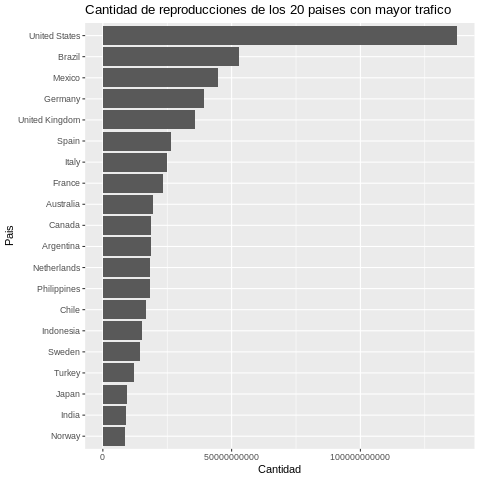

In [ ]:
%%R
ggplot(streamsRegion[order(-streamsRegion$streams), ][2:21,]) +   # asociamos un data frame a ggplot
  geom_bar(aes(x = reorder(region, streams), y = streams), stat="identity") +   # creamos un grafico de barras como una capa
  coord_flip() +  # transformamos el grafico invirtiendo los ejes de coordenadas (sólo visualmente)
  ggtitle("Cantidad de reproducciones de los 20 paises con mayor trafico") + # título
  xlab("Pais") + ylab("Cantidad")  # etiqueta

##### Caracterización específica de Chile

In [ ]:
%%R
# Suma cuantos datos hay en Chile
sum(spotifyChart$region == "Chile")

[1] 352185


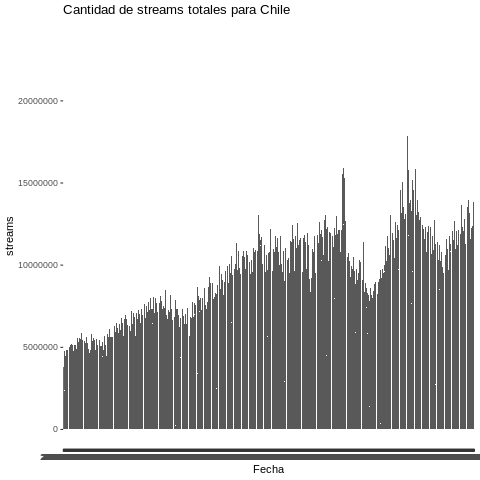

In [ ]:
%%R
# Reproducciones a lo largo del tiempo del top 200 en Chile
tpoChile <- aggregate(streams ~ date, topChile, FUN=sum)
tpoChile <- tpoChile[order(tpoChile$date), ]


ggplot(topChile) +
  geom_bar(aes(x=date, y=streams), stat='identity') +
  ggtitle("Cantidad de streams totales para Chile") + 
  xlab("Fecha") + ylab("streams") 

#### Caracterización por artistas

A continuación se realiza una tabla con la cantidad de streams por artista

In [ ]:
%%R
streamsArtist<-aggregate(streams ~ artist, spotifyChart, FUN=sum)
head(streamsArtist)

                artist  streams
1                  -M-    81350
2  -M-, Michel Legrand   237517
3                  ?te  1867744
4               .benzo     2453
5               .Feast 18297375
6 .Feast, Rayssa Dynta  6680548


Se muestran los 20 artistas con más reproducciones:

In [ ]:
%%R
streamsArtist[order(-streamsArtist$streams), ][1:20,]

               artist     streams
10040      Ed Sheeran 22741603960
28531     Post Malone 19197177105
9660            Drake 17796165273
4276    Billie Eilish 16831058618
2564    Ariana Grande 15187905538
37384    XXXTENTACION 12009158612
9765         Dua Lipa 11896985612
17363      Juice WRLD 11689143660
34721      The Weeknd 11588902960
35473    Travis Scott  9152387455
17580   Justin Bieber  8886085467
27035  Olivia Rodrigo  8816319776
3367        Bad Bunny  8638114412
15095 Imagine Dragons  7262605685
14052    Harry Styles  6942072330
20737       Lil Nas X  6913373967
34088    Taylor Swift  6853427079
18706          Khalid  6741307791
20524   Lewis Capaldi  6663780227
5350              BTS  6572845548


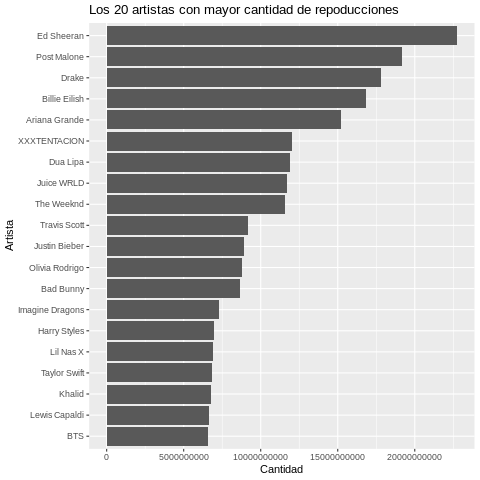

In [ ]:
%%R
ggplot(streamsArtist[order(-streamsArtist$streams), ][1:20,]) +   # asociamos un data frame a ggplot
  geom_bar(aes(x = reorder(artist, streams), y = streams), stat="identity") +   # creamos un grafico de barras como una capa
  coord_flip() +  # transformamos el grafico invirtiendo los ejes de coordenadas (sólo visualmente)
  ggtitle("Los 20 artistas con mayor cantidad de repoducciones") + # título
  xlab("Artista") + ylab("Cantidad")  # etiquetas

In [ ]:
%%R
subsetArtist<-subset(spotifyChart, artist %in% streamsArtist[order(-streamsArtist$streams), ][1:5,]$artist)

Cambiamos el formato de la fecha desde string a date

In [ ]:
%%R
topChile$date<-as.Date(topChile$date)
subsetArtist$date<-as.Date(subsetArtist$date)

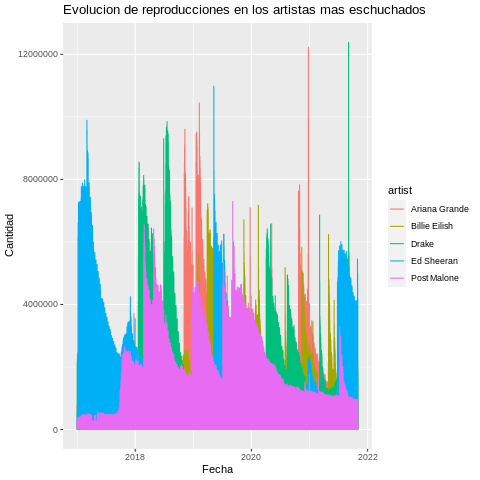

In [ ]:
%%R
ggplot(subsetArtist) +   # asociamos un data frame a ggplot
  geom_line(aes(x = date, y = streams , colour = artist ), stat="identity") +   # creamos un grafico de barras como una capa
  ggtitle("Evolucion de reproducciones en los artistas mas eschuchados") + # título
  xlab("Fecha") + ylab("Cantidad")  # etiquetas

##### Centrándose en un sólo artista

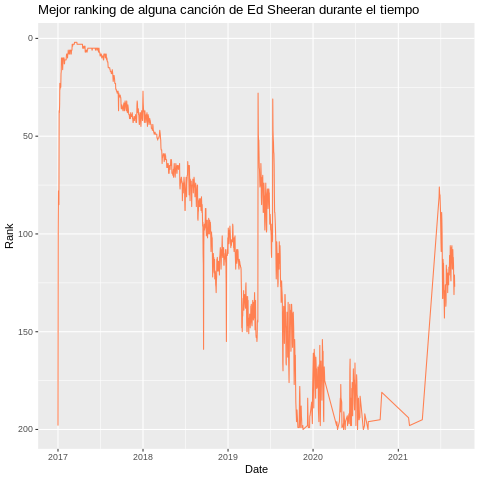

In [ ]:
%%R
subEd<-aggregate(rank ~ artist+date, topChile, FUN=min)
subEd <- with(subEd, subEd[artist == 'Ed Sheeran', ])
ggplot(subEd) +
  geom_line(aes(x = date, y = rank), stat="identity", color='coral') + 
    scale_y_reverse() +
  ggtitle("Mejor ranking de alguna canción de Ed Sheeran durante el tiempo") + 
  xlab("Date") + ylab("Rank")

#### Caracterización por canciones

Luego, una tabla con la cantidad de streams por canción:

In [ ]:
%%R
streamsTitle<-aggregate(streams ~ title + artist, spotifyChart, FUN=sum)

Y aquí se muestran las 10 canciones más reproducidas:

In [ ]:
%%R
streamsTitle[order(-streamsTitle$streams), ][1:10,]

                                              title
25457                                  Shape of You
90788                               Blinding Lights
92210                                  Dance Monkey
53711                             Someone You Loved
74794 Sunflower - Spider-Man: Into the Spider-Verse
83500                                      Señorita
11102                                       bad guy
24667                               Don't Start Now
44922                                  Lucid Dreams
39007                                      Believer
                            artist    streams
25457                   Ed Sheeran 5195020979
90788                   The Weeknd 5025539799
92210                  Tones And I 4497591845
53711                Lewis Capaldi 3919387236
74794        Post Malone, Swae Lee 3711068758
83500 Shawn Mendes, Camila Cabello 3552457038
11102                Billie Eilish 3464498734
24667                     Dua Lipa 3182333314
44922         

En la siguiente tabla se registran los 5 artistas con más reproducciones:

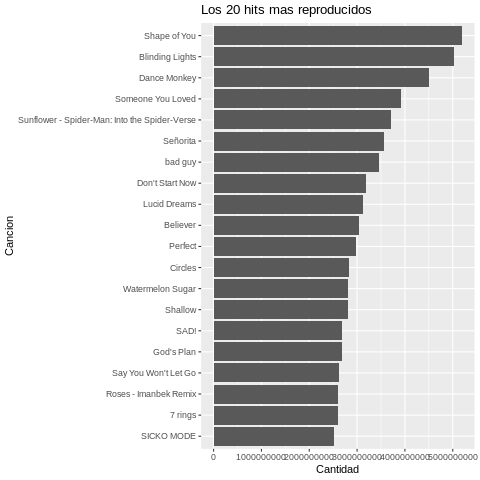

In [ ]:
%%R
ggplot(streamsTitle[order(-streamsTitle$streams), ][1:20,]) +   # asociamos un data frame a ggplot
  geom_bar(aes(x = reorder(title, streams), y = streams), stat="identity") +   # creamos un grafico de barras como una capa
  coord_flip() +  # transformamos el grafico invirtiendo los ejes de coordenadas (sólo visualmente)
  ggtitle("Los 20 hits mas reproducidos") + # título
  xlab("Cancion") + ylab("Cantidad")  # etiquetas

##### Centrándose en una canción


El siguiente procedimiento permite estudiar la variación del ranking para una canción en específico. En este caso se utilizó “Despacito”, por Luis Fonsi y Daddy Yankee.

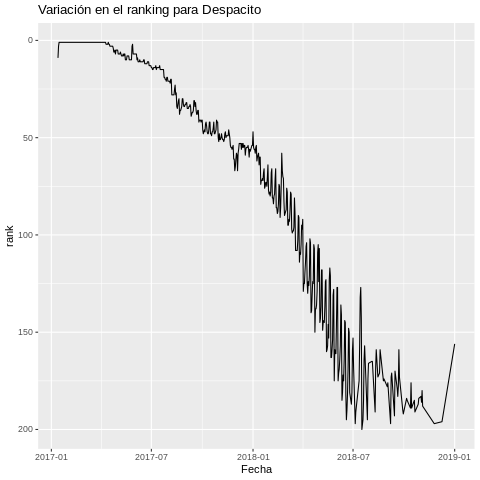

In [ ]:
%%R
despacito <- topChile[topChile$title == "Despacito (Featuring Daddy Yankee)", ]
despacito <- despacito[order(despacito$date), ]

ggplot(despacito) +
  geom_line(aes(x=date, y=rank), stat="identity") +
  scale_y_reverse() +
  ggtitle("Variación en el ranking para Despacito") + 
  xlab("Fecha") + ylab("rank")

Acá también podemos ver la variación en la cantidad de streams para la misma canción:

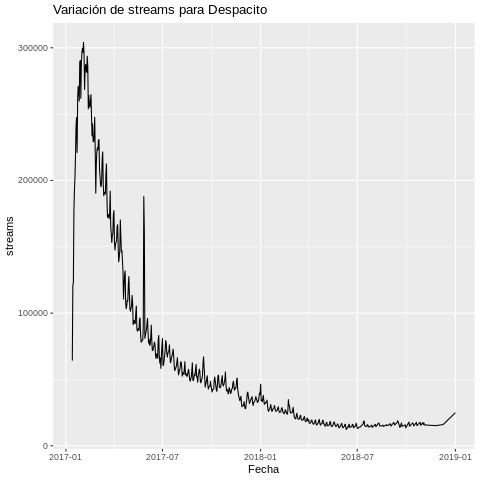

In [ ]:
%%R
ggplot(despacito) +
  geom_line(aes(x=date, y=streams), stat="identity") +
  ggtitle("Variación de streams para Despacito") + 
  xlab("Fecha") + ylab("streams")

## Corrección Hito 1

Tomamos en consideración varios comentarios presentados en la evaluación del hito 1. Entre estos destacan los siguientes:

- Mostrar aumento en cantidad de streamings después de iniciada la pandemia. Dentro de nuestra motivación para estudiar datasets correspondiente a Spotify, mencionamos sobre un aumento en la cantidad de streamings desde que inició la pandemia y no demostramos este hecho en la primera entrega. Esto se puede ver con la cantidad de Streams totales a nivel global.

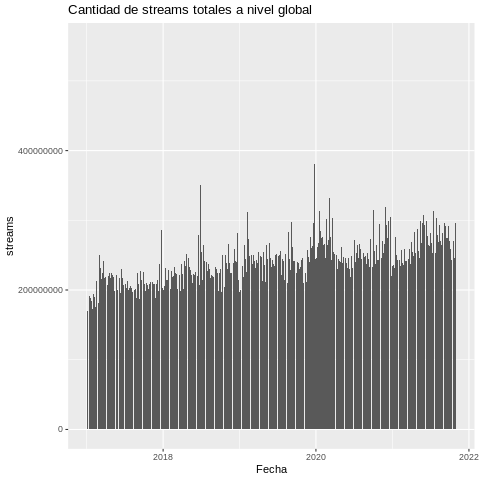

In [ ]:
%%R
topGlobal <- spotifyChart[spotifyChart$region == 'Global', ]
topGlobal$date = as.Date(topGlobal$date)
topGlobal <- aggregate(streams ~ date, topGlobal, FUN=sum)
topGlobal <- topGlobal[order(topGlobal$date), ]


ggplot(topGlobal) +
  geom_bar(aes(x=date, y=streams), stat='identity') +
  ggtitle("Cantidad de streams totales a nivel global") + 
  xlab("Fecha") + ylab("streams")

En este gráfico se puede notar como a través de los años la cantidad de streams aumenta levemente, con el peak más alto al inicio del año 2020, finales del 2019.

La segunda observación a considerar es:
- No poseemos canciones no exitosas para lograr una comparación entre hits y no hits. Para resolver esta situación, las preguntas que comprenden una separación entre hits y no hits, se realizarán considerando un umbral dentro del top 200 separando hits de super hits. Este umbral se considerará dejando las primeras ? canciones del top 200 como superhits y las demás como hits.

Por último, una observación clave que se nos realizó fue:

- Obtener un dataset que contenga distintas características de las canciones.

Esta última observación es de suma importancia, ya que dentro de nuestros problemas planteados se encuentra el reconocer algún súper hit por sus características. Este dataset no se incluyó dentro del primer hito debido a que no lo poseíamos y en un inicio no fue considerado, mas se hizo necesario para dar un análisis con mayor profundidad.

## Preguntas y problemas

### ¿Es posible predecir si una canción va a ser popular según sus características?

Esta información es vital para los artistas que busquen ser el próximo hit: si logramos definir las características de las mejores canciones de los últimos años se podría componer una canción que cumpla estas características para tener una mayor probabilidad de ser un hit.

### ¿Qué características tienen en común las canciones de éxito?

Muchas veces las canciones que escuchamos tienen características en común de las que no nos damos cuenta: con esto podríamos extraerlas y analizar por qué estas canciones son tan populares.

### ¿Cuales son los géneros más escuchados en cada país o región?

Existe en el pensamiento colectivo que, por ejemplo, en Latinoamérica se escuchan más las canciones más bailables, y con este estudio podremos confirmar o rechazar esta hipótesis. Estos datos servirán también para los artistas que quieran entrar en una región nueva, entregandoles información de los mejores géneros para esta misma.

Dado que esta pregunta es de carácter predictivo y además en nuestros dataset no tenemos el genero de las canciones, usaremos técnicas de clasificación para predecir el género y poder evaluar los géneros en cada país o región. Se etiquetaría manualmente un set de entrenamiento, buscando en internet el género de cierta cantidad de canciones para poder entrenar el clasificador. Para evaluar la calidad de la clasificación usaremos probaremos con distintos algoritmos de clasificación y distintas métricas. Luego probaremos con técnicas de clustering para evaluar si se agrupan según género.

### ¿Es posible predecir si un género será más/menos popular cada año?

Un caso de estudio interesante es el ‘boom’ de los últimos años que ha tenido el trap en Chile: quizás podríamos predecir algún otro fenómeno parecido, o intentar explicar a partir de los datos este último.

Dado que la pregunta anterior nos permitirá predecir géneros, podremos evaluar los tipos de géneros que mas y menos se repiten por año y así, con técnicas de clasificación , predecir si un generó será mas o menos popular cada año.

###  ¿Cuales son los artistas que más han perdurado en el top de reproducciones?

Esta información podría ser útil a la hora de dar premios a los mejores artistas de los últimos años.

En el caso de esta pregunta, veremos tanto los artistas que han perdurado debido a constantes canciones en el top 10 y tambien los que se han mantenido solo con una sola.

### ¿Que canciones han perdurado a través del tiempo?

¿Sienten que Despacito se escuchó a más no poder durante varios años? Con esta información podremos confirmar o rechazar esta idea.

## Implementacion de preguntas y problemas


## ¿Es posible predecir si una canción va a ser popular según sus características?
Para desarrollar sobre esta pregunta se decidió entrenar un clasificador conectando creando nuevos dataframes conectando con la API de Spotify para obtener las caracteristicas de las canciones.


In [ ]:
import pandas as pd

chileFeatures2020 = pd.read_csv('spotify-charts-features.csv')
topChileDf = pd.read_csv('topChile.csv')

### Exploración del nuevo dataset

#### Descripción del dataset

In [ ]:
chileFeatures2020.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.801,0.745,6,-3.733,0,0.0630,0.3980,0.006030,0.1530,0.245,104.965,audio_features,3JHpk0DOTOzyh0777JFAky,spotify:track:3JHpk0DOTOzyh0777JFAky,https://api.spotify.com/v1/tracks/3JHpk0DOTOzy...,https://api.spotify.com/v1/audio-analysis/3JHp...,214013,4
1,0.731,0.573,4,-10.059,0,0.0544,0.4010,0.000052,0.1130,0.145,109.928,audio_features,4MzXwWMhyBbmu6hOcLVD49,spotify:track:4MzXwWMhyBbmu6hOcLVD49,https://api.spotify.com/v1/tracks/4MzXwWMhyBbm...,https://api.spotify.com/v1/audio-analysis/4MzX...,205090,4
2,0.863,0.666,1,-4.158,0,0.1520,0.2120,0.000493,0.1030,0.838,163.908,audio_features,7vrJn5hDSXRmdXoR30KgF1,spotify:track:7vrJn5hDSXRmdXoR30KgF1,https://api.spotify.com/v1/tracks/7vrJn5hDSXRm...,https://api.spotify.com/v1/audio-analysis/7vrJ...,178947,4
3,0.856,0.618,7,-4.892,1,0.2860,0.0303,0.000000,0.0866,0.391,81.993,audio_features,2XIc1pqjXV3Cr2BQUGNBck,spotify:track:2XIc1pqjXV3Cr2BQUGNBck,https://api.spotify.com/v1/tracks/2XIc1pqjXV3C...,https://api.spotify.com/v1/audio-analysis/2XIc...,203201,4
4,0.725,0.756,4,-5.013,1,0.0572,0.3620,0.000685,0.1030,0.828,100.070,audio_features,3VvA1wSxukMLsvXoXtlwWx,spotify:track:3VvA1wSxukMLsvXoXtlwWx,https://api.spotify.com/v1/tracks/3VvA1wSxukML...,https://api.spotify.com/v1/audio-analysis/3VvA...,186133,4


Los atributos que nos interesan para la exploración del nuevo dataset son:


*   **danceability:** Valor entre 0 y 1 de que tan bailable es una canción
*   **energy:** Valor entre 0 y 1 que representa la intensidad y actividad de una canción
*   **key:** La llave en la que está la canción
*   **loudness:** la intensidad promedio de la cancion (en dB). El valor está promediado entre todas las canciones de Spotify y varía, en este dataset, entre -27 y 1.
*   **mode:** El modo de la canción, mayor es 1 y menor es 0.
*   **speechiness:** Valor entre 0 y 1 de si hay presencia de letra cantada en la canción. Un valor sobre 0.66 indica que, con gran probabilidad, la canción está compuesta únicamente de letras, entre 0.66 y 0.33 que contiene tanto letras como instrumentos y menor a 0.33 que contiene únicamente instrumentos.
*   **acousticness:** medida entre 0 y 1 de que tan acústica es una canción
*   **instrumentalness:** valor entre 0 y de que tan instrumantal es una canción. Se condideran con alta probabilidad, que una canción que tiene un valor sobre 0.5 es completamente instrumental.
*   **valence:** Valor entre 0 y 1 que descibe la positividad que entrega la canción. 
*   **tempo:** El tempo promedio estimado de la canción, en BPM.
*   **duration_ms:** Duración de la canción en milisegundos

Por lo tanto, vamos a quedarnos sólo con esas columnas, y vamos a sacar las filas repetidas:

In [ ]:
chileFeatures2020_expl = chileFeatures2020[~chileFeatures2020.duplicated() == 1] # sacamos los duplicados
columns = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms'] # las columnas que nos interesan
chileFeatures2020_expl = chileFeatures2020_expl[columns]
chileFeatures2020_expl.info(memory_usage=False, null_counts=False)
# print(chileFeatures2020_expl.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1198 entries, 0 to 60693
Data columns (total 12 columns):
 #   Column            Dtype  
---  ------            -----  
 0   danceability      float64
 1   energy            float64
 2   key               int64  
 3   loudness          float64
 4   mode              int64  
 5   speechiness       float64
 6   acousticness      float64
 7   instrumentalness  float64
 8   liveness          float64
 9   valence           float64
 10  tempo             float64
 11  duration_ms       int64  
dtypes: float64(9), int64(3)

Veamos la correlación entre los distintos atributos:

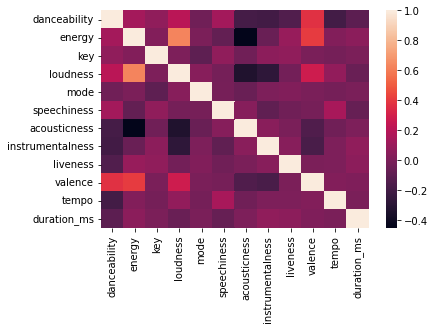

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = chileFeatures2020_expl.corr()
sns.heatmap(corr)
plt.show()

Luego, podemos ordenar las correlaciones de más altas a más bajas (en valor absoluto):

In [ ]:
correlaciones = corr.unstack().sort_values(ascending=False).drop_duplicates()
print('Los atributos con una correlación más alta son:')
print(correlaciones[1:6].to_string(header=False))
print('\nMientras que los con una correlación negativa más alta son:')
print(correlaciones[-6:-1].to_string(header=False))

Los atributos con una correlación más alta son:
energy        loudness        0.626753
              valence         0.409171
danceability  valence         0.376319
loudness      valence         0.284375
              danceability    0.212239

Mientras que los con una correlación negativa más alta son:
acousticness  danceability       -0.185039
tempo         danceability       -0.191391
danceability  instrumentalness   -0.196543
loudness      instrumentalness   -0.274608
              acousticness       -0.328957


Podemos ver entonces que el atributo 'energy' tiene alta correlación con los atributos 'loudness' y 'valence'. Esto se ve lógico, debido a que una canción más encendida tiende a ser más fuerte y tiende a ser vista como más positiva. Mientras tanto, los atributos con una correlación negativa más alta son 'loudness' tanto con 'instrumentalness' como con 'acousticness': nuevamente es lógico, debido a que una canción fuerte tiende a ...

A continuación, presentaremos gráficos para ver las frecuencias de algunos de los atributos, y así ver a priori como se distribuyen estos dentro de las canciones extraídas con la API:

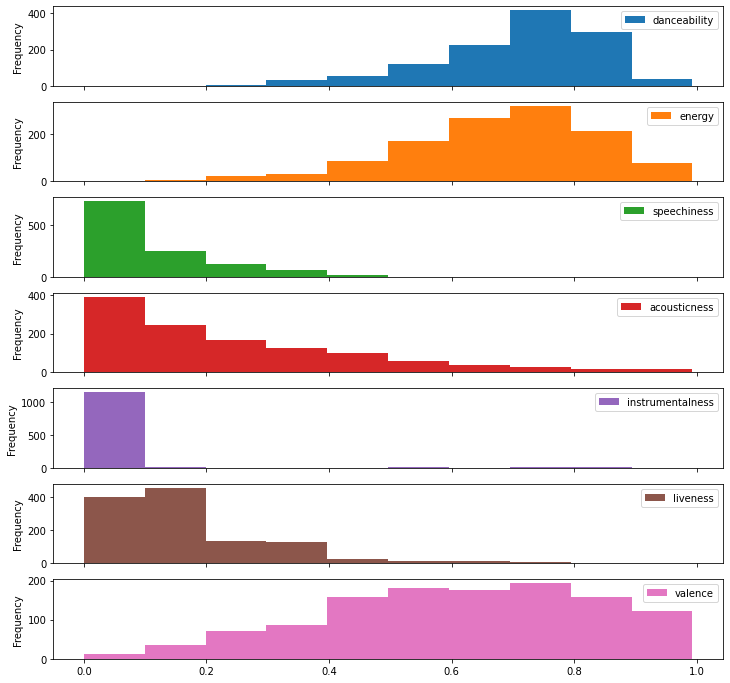

In [ ]:
chileFeatures2020_expl[['danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence']].plot.hist(subplots=True, figsize=(12, 12))
plt.show()

Tambien se pueden ver las frecuencias de las variables categóricas:

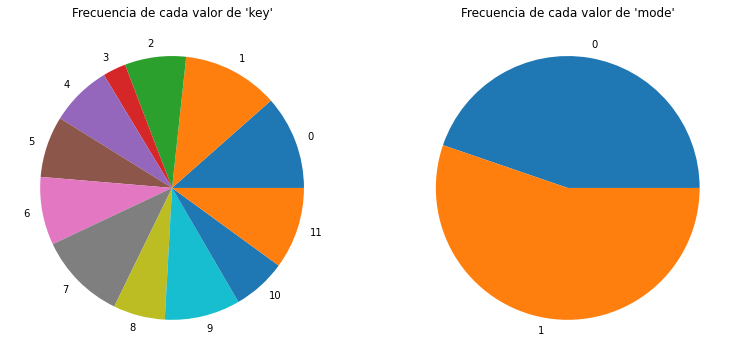

In [ ]:
key = chileFeatures2020_expl.groupby(['key'])['danceability'].count().rename('Cantidad')
mode = chileFeatures2020_expl.groupby(['mode'])['danceability'].count().rename('Cantidad')

fig, axes = plt.subplots(1,2, figsize=(13,13))

axes[0].pie(key, labels=key.index)
axes[0].set_title("Frecuencia de cada valor de 'key'")

axes[1].pie(mode, labels=mode.index)
axes[1].set_title("Frecuencia de cada valor de 'mode'")

plt.show()

Igualmente podemos ver algún gráfico scatter entre 2 variables, elijamos las con mayor correlación positiva y negativa:

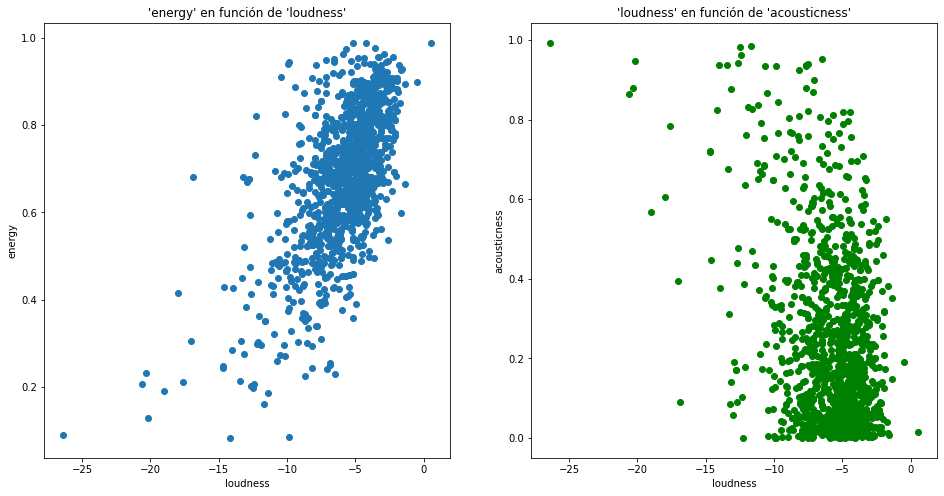

In [ ]:
fig, axes = plt.subplots(1,2, figsize=(16,8))

axes[0].scatter(chileFeatures2020_expl['loudness'], chileFeatures2020_expl['energy'])
axes[0].set_xlabel('loudness')
axes[0].set_ylabel('energy')
axes[0].set_title("'energy' en función de 'loudness'")

axes[1].scatter(chileFeatures2020_expl['loudness'], chileFeatures2020_expl['acousticness'], c='g')
axes[1].set_xlabel('loudness')
axes[1].set_ylabel('acousticness')
axes[1].set_title("'loudness' en función de 'acousticness'")

# chileFeatures2020_expl[['energy', 'loudness']].plot.scatter(y='energy', x='loudness', figsize=(8,8))
plt.show()

###Preprocesamiento para poder realizar el Join y agregar las columna de superhit
Para definir si una cancion puede ser o no un superhit se toma en cuenta todas las canciones que cuyo rank es menor a 50 para posteriormente poder entrenar un clasificador



In [ ]:
# from google.colab import drive
# import pandas as pd

# drive.mount('/content/drive')
# chileFeatures2020 = pd.read_csv('/content/drive/MyDrive/spotify-charts-features.csv')
# topChileDf = pd.read_csv('/content/drive/MyDrive/topChile.csv')

Mounted at /content/drive


In [ ]:
new = topChileDf["url"].str.split("track/", n = 1, expand = True)
topChileDf["trackID"] = new[1]

# 2021 es hasta septiembre
chile2021df = topChileDf[topChileDf["date"]>="2021"]

dataframeChile2021Completo = pd.merge(chileFeatures2020, chile2021df, left_on="id", right_on="trackID")
dataframeChile2021Completo = dataframeChile2021Completo.dropna(how='any')

In [ ]:
data = dataframeChile2021Completo.drop(columns=["type","key", "id", "mode", "uri", "track_href","date", "analysis_url", "time_signature", "url", "trackID", "title", "artist", "duration_ms", "streams"])
data["Class"] = (data["rank"] <= 50).astype(int)
data = data.drop(columns=["rank"])

In [ ]:
print("Distribucion de clases original")
data['Class'].value_counts()

Distribucion de clases original


0    5217688
1    2364068
Name: Class, dtype: int64

###Creacion y Entrenamiento del Clasificador


In [ ]:
from sklearn.model_selection import train_test_split
data_train, data_test, ytrain, ytest = train_test_split(data, data['Class'], test_size=0.3, stratify=data['Class'])
# proporción de clases en el train después de dividir en train-test
ytrain.value_counts()

0    3652381
1    1654848
Name: Class, dtype: int64

In [ ]:
import numpy as np

print("Distribución de clases usando (over/sub) sampling")
print()

data_train = data_train.reset_index(drop=True)

# oversampling sobre la clase 1
idx = np.random.choice(data_train[data_train['Class'] == 1].index, size=1997533)
data_oversampled = pd.concat([data_train, data_train.iloc[idx]])
print("Data oversampled on class '1'")
print(data_oversampled['Class'].value_counts())
print()


# subsampling sobre la clase 0
idx = np.random.choice(data_train.loc[data_train.Class == 0].index, size=1997533, replace=False)
data_subsampled = data_train.drop(data_train.iloc[idx].index)
print("Data subsampled on class '0'")
print(data_subsampled['Class'].value_counts())

Distribución de clases usando (over/sub) sampling

Data oversampled on class '1'
1    3652381
0    3652381
Name: Class, dtype: int64

Data subsampled on class '0'
1    1654848
0    1654848
Name: Class, dtype: int64


In [ ]:
## ejecutar este código para preparar los datos
from sklearn.metrics import classification_report

# Preparando los data frames para ser compatibles con sklearn

# datos test (mismo para todos los conjuntos de entrenamiento)
X_test = data_test[data_train.columns[:-1]] # todo hasta la penultima columna
y_test = data_test[data_train.columns[-1]]  # la última columna

# datos entrenamiento "originales"
X_orig = data_train[data_train.columns[:-1]] 
y_orig = data_train[data_train.columns[-1]] 

# # datos entrenamiento "oversampleados" 
X_over = data_oversampled[data_train.columns[:-1]]
y_over = data_oversampled[data_train.columns[-1]]

# # datos entrenamiento "subsampleados"
X_subs = data_subsampled[data_train.columns[:-1]]
y_subs = data_subsampled[data_train.columns[-1]]



In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

## Pasos:
##  - instanciar el clasificador con DecisionTreeClassifier()
##  - entrenar con fit()
##  - hacer las predicciones
##  - mostrar precision, recall y f1-score con classification report.

print("ORIGINAL::::::::::")
clf_orig = DecisionTreeClassifier()
clf_orig.fit(X_orig, y_orig)
pred_orig = clf_orig.predict(X_test)
print(classification_report(y_test, pred_orig))

print("OVERSAMPLING::::::::::")
clf_over = DecisionTreeClassifier()
clf_over.fit(X_over, y_over)
pred_over = clf_over.predict(X_test)
print(classification_report(y_test, pred_over))

print("SUBSAMPLING::::::::::")
clf_subs = DecisionTreeClassifier()
clf_subs.fit(X_subs, y_subs)
pred_subs = clf_subs.predict(X_test)
print(classification_report(y_test, pred_subs))

ORIGINAL::::::::::
              precision    recall  f1-score   support

           0       0.90      0.90      0.90   1565307
           1       0.77      0.77      0.77    709220

    accuracy                           0.86   2274527
   macro avg       0.83      0.83      0.83   2274527
weighted avg       0.86      0.86      0.86   2274527

OVERSAMPLING::::::::::
              precision    recall  f1-score   support

           0       0.96      0.80      0.87   1565307
           1       0.68      0.93      0.78    709220

    accuracy                           0.84   2274527
   macro avg       0.82      0.87      0.83   2274527
weighted avg       0.87      0.84      0.85   2274527

SUBSAMPLING::::::::::
              precision    recall  f1-score   support

           0       0.96      0.80      0.87   1565307
           1       0.68      0.93      0.78    709220

    accuracy                           0.84   2274527
   macro avg       0.82      0.87      0.83   2274527
weighted a

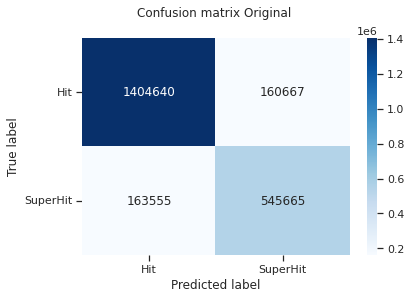

In [ ]:
import matplotlib.pyplot as plt   # importa pyplot
import seaborn as sns; sns.set(style="ticks", color_codes=True)   # importa seaborn y configura el estilo
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

# Compute confusion matrix. By default is not normalized (normalize=None)
# If necessary change 'y_pred' according to your variable name
cm = confusion_matrix(y_test, pred_orig) 

# Only use the labels that appear in the data
classes = unique_labels(["Hit", "SuperHit"])

df = pd.DataFrame(cm, index = classes, columns = classes)

g = sns.heatmap(df, annot=True, cmap="Blues" , fmt="d")
g.set_yticklabels(g.get_yticklabels(), rotation = 0)

plt.title('Confusion matrix Original \n')
plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.autoscale()

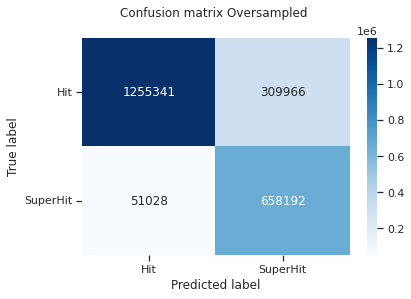

In [ ]:
import matplotlib.pyplot as plt   # importa pyplot
import seaborn as sns; sns.set(style="ticks", color_codes=True)   # importa seaborn y configura el estilo
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

# Compute confusion matrix. By default is not normalized (normalize=None)
# If necessary change 'y_pred' according to your variable name
cm = confusion_matrix(y_test, pred_over) 

# Only use the labels that appear in the data
classes = unique_labels(["Hit", "SuperHit"])

df = pd.DataFrame(cm, index = classes, columns = classes)

g = sns.heatmap(df, annot=True, cmap="Blues" , fmt="d")
g.set_yticklabels(g.get_yticklabels(), rotation = 0)

plt.title('Confusion matrix Oversampled \n')
plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.autoscale()

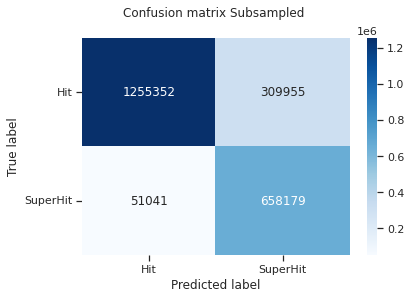

In [ ]:
import matplotlib.pyplot as plt   # importa pyplot
import seaborn as sns; sns.set(style="ticks", color_codes=True)   # importa seaborn y configura el estilo
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

# Compute confusion matrix. By default is not normalized (normalize=None)
# If necessary change 'y_pred' according to your variable name
cm = confusion_matrix(y_test, pred_subs) 

# Only use the labels that appear in the data
classes = unique_labels(["Hit", "SuperHit"])

df = pd.DataFrame(cm, index = classes, columns = classes)

g = sns.heatmap(df, annot=True, cmap="Blues" , fmt="d")
g.set_yticklabels(g.get_yticklabels(), rotation = 0)

plt.title('Confusion matrix Subsampled \n')
plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.autoscale()

Como se puede observar al realizar subsampling el clasificador predice mejor los superhits, pero a cambio se aumenta la probabilidad de que una cancion sea categorizada como superHit cuando esta no lo es(Error de tipo 1).

Como conclusión encontramos que este clasificador no es lo suficientemente robusto para poder determinar si una cancion será o no un superHit debido a sus metricas y por lo tanto no es posible determinar (con una gran certeza) si una cancion es un superHit a partir de sus atributos cuantitativos entregados por la Spotify API.

## ¿Qué características tienen en común las canciones de éxito?

Para poder encontrar cuales son las caracteristicas se tienen común se ocuparán técnicas de clustering y se estudiara las distribuciones de los atributos en cada clúster.

###Preprocesamiento para poder realizar el Join
Para poder juntar ambas columnas se procesa el link de reproduccion de cada cancion para extraer su id, con esta mista se realiza un merge de las tablas para correlacionar cada cancion con su respectivas caracteristicas

In [ ]:
topChileDf=topChileDf[topChileDf["rank"]<50]
new = topChileDf["url"].str.split("track/", n = 1, expand = True)
topChileDf["trackID"] = new[1]

# 2021 es hasta septiembre
chile2021df = topChileDf[topChileDf["date"]>="2021"]

dataframeChile2021Completo = pd.merge(chileFeatures2020, chile2021df, left_on="id", right_on="trackID")
dataframeChile2021Completo = dataframeChile2021Completo.dropna(how='any')
X = dataframeChile2021Completo.drop(columns=["type","key", "id", "mode", "uri", "track_href","date", "analysis_url", "time_signature", "url", "trackID", "title", "rank", "artist", "duration_ms", "streams"])
X = X.reset_index(drop=True)
X

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.731,0.573,-10.059,0.0544,0.40100,0.000052,0.113,0.145,109.928
1,0.731,0.573,-10.059,0.0544,0.40100,0.000052,0.113,0.145,109.928
2,0.731,0.573,-10.059,0.0544,0.40100,0.000052,0.113,0.145,109.928
3,0.731,0.573,-10.059,0.0544,0.40100,0.000052,0.113,0.145,109.928
4,0.731,0.573,-10.059,0.0544,0.40100,0.000052,0.113,0.145,109.928
...,...,...,...,...,...,...,...,...,...
2325788,0.702,0.741,-5.330,0.0427,0.00544,0.000000,0.337,0.646,124.925
2325789,0.702,0.741,-5.330,0.0427,0.00544,0.000000,0.337,0.646,124.925
2325790,0.702,0.741,-5.330,0.0427,0.00544,0.000000,0.337,0.646,124.925
2325791,0.702,0.741,-5.330,0.0427,0.00544,0.000000,0.337,0.646,124.925


###Clustering
Para el proceso de clustering, se decidió usar k-means. Este algoritmo por lo que debemos determinar la cantidad de cluster a generar. La razón principal a utilizar k-means radica principalmente en el tiempo de ejecucion por el gran volumen de datos. Para encontrar el numero de clusters, se usó el método del codo como se muestra a continuación:

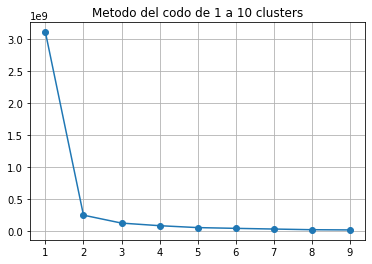

In [ ]:
# metodo del codo
from sklearn.cluster import KMeans
from sklearn import datasets
import matplotlib.pyplot as plt

sse = []

clusters = list(range(1, 10))
for k in clusters:
    # print(k)
    kmeans = KMeans(n_clusters=k).fit(X)
    sse.append(kmeans.inertia_)

plt.plot(clusters, sse, marker="o")
plt.title("Metodo del codo de 1 a 10 clusters")
plt.grid(True)
plt.show()

El número de clusters óptimo encontrado es k = 3. A continuación, se muestra el resultado del clustering, debido a la alta dimensionalidad  de los datos se utilizara PCA para reducir los datos a dos dimensiones.

In [ ]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

new_X = PCA(n_components=2, random_state=12).fit_transform(X)
# new_y = TSNE(n_components=2, random_state=12).fit_transform(X) //TSNE se descarto ya que consume mas de 25gb de RAM al ejecutar

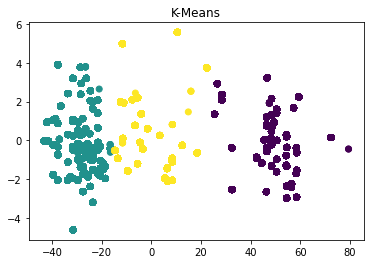

In [ ]:
from sklearn.cluster import KMeans
from sklearn import datasets
import matplotlib.pyplot as plt
random_state = 20
kmeans = KMeans(n_clusters=3, random_state=random_state).fit(new_X)
plt.scatter(new_X[:, 0], new_X[:, 1], c=kmeans.labels_)
plt.title("K-Means")
plt.show()

In [ ]:
from sklearn.cluster import KMeans
from sklearn import datasets
import matplotlib.pyplot as plt
kmeans = KMeans(n_clusters=3, random_state=random_state).fit(X)

In [ ]:
X["cluster"]=kmeans.labels_

In [ ]:
X.groupby('cluster').mean()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
cluster,,,,,,,,,
0,0.736171,0.665706,-5.032742,0.146060,0.219730,0.000202,0.147041,0.654191,170.636821
1,0.773173,0.702067,-4.850920,0.121631,0.241654,0.000157,0.174586,0.653720,92.477404
2,0.790436,0.665609,-6.450194,0.086759,0.306801,0.032774,0.152758,0.528785,118.520534


Analizando el promedio de los atributos de cada cluster podemos concluir lo siguiente. Todas las canciones que alcanzaron el top 50 son canciones predominantemente bailables(danceability) e intensas(energy), cuyo temas principales suelen ser de tendencia positiva(ej: Felices, alegres, eufóricas) y como se puede observar en la tabla se tiene un alto rango de diferencia en su intrumentalismo. 

## Artistas que más han perdurado en el top 200.

Se estudiará de dos maneras distintas los artistas que más han estado presente en el top. Primero, se tomará el top 10 de canciones y se verá qué artistas han estado presente por la mayor cantidad de tiempo con cualquiera de sus canciones. En un segundo ámbito, se verá qué artistas se han mantenido dentro del top 200 con tan solo una canción.

### Artistas presentes en top 10

Para revisar los artistas se hará tanto a nivel global como en la región chilena. Importamos ambos en distintos dataframes.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
topTotal = pd.read_csv("/content/drive/MyDrive/spotify-charts.csv")
topTotal.dropna()

,title,rank,date,artist,url,region,chart,trend,streams
0,Despacito (Featuring Daddy Yankee),1,2017-04-01,Luis Fonsi,https://open.spotify.com/track/4aWmUDTfIPGksMN...,Argentina,top200,SAME_POSITION,306716.0
1,El Amante,2,2017-04-01,Nicky Jam,https://open.spotify.com/track/3umS4y3uQDkqekN...,Argentina,top200,MOVE_UP,189310.0
2,SUBEME LA RADIO (feat. Descemer Bueno & Zion &...,3,2017-04-01,Enrique Iglesias,https://open.spotify.com/track/7nKBxz47S9SD79N...,Argentina,top200,MOVE_UP,187749.0
3,Shape of You,4,2017-04-01,Ed Sheeran,https://open.spotify.com/track/7qiZfU4dY1lWllz...,Argentina,top200,MOVE_DOWN,185567.0
4,La Rompe Corazones,5,2017-04-01,"Daddy Yankee, Ozuna",https://open.spotify.com/track/4okba5wu9mMLXx7...,Argentina,top200,MOVE_UP,150052.0
...,...,...,...,...,...,...,...,...,...
23708262,Ngày Tận Thế,196,2021-07-31,"Tóc Tiên, Da LAB, Touliver",https://open.spotify.com/track/5Nd0com2T4rHRZO...,Vietnam,top200,NEW_ENTRY,3618.0
23708263,Halley's Comet,197,2021-07-31,Billie Eilish,https://open.spotify.com/track/5XsAal7ZcWg1I5T...,Vietnam,top200,MOVE_DOWN,3615.0
23708264,Stuck with U (with Justin Bieber),198,2021-07-31,Ariana Grande,https://open.spotify.com/track/4HBZA5flZLE435Q...,Vietnam,top200,NEW_ENTRY,3605.0
23708265,Đìu Anh Luôn Giữ Kín Trong Tym,199,2021-07-31,"RPT MCK, Tlinh, 2Pillz",https://open.spotify.com/track/569B75eNRVDABuN...,Vietnam,top200,MOVE_DOWN,3602.0


In [ ]:
topGlobal = topTotal[topTotal['region'] == 'Global']
top10Global = topGlobal[topGlobal['rank'] <= 10]

topChile = topTotal[topTotal['region'] == 'Chile']
top10Chile = topChile[topChile['rank'] <= 10]

In [ ]:
top10Chile['date']=pd.to_datetime(top10Chile['date'].astype(str), format='%Y/%m/%d')  #Pasar fecha a formato fecha
top10Global['date']=pd.to_datetime(top10Global['date'].astype(str), format='%Y/%m/%d')

In [ ]:
top10Chile.sort_values(by='date') #Ordenar dataframe por fecha
top10Global.sort_values(by='date')

,title,rank,date,artist,url,region,chart,trend,streams
118618,Starboy,1,2017-01-01,"The Weeknd, Daft Punk",https://open.spotify.com/track/5aAx2yezTd8zXrk...,Global,top200,SAME_POSITION,3135625.0
118627,I Feel It Coming,10,2017-01-01,"The Weeknd, Daft Punk",https://open.spotify.com/track/5GXAXm5YOmYT0kL...,Global,top200,MOVE_DOWN,1949575.0
118626,Black Beatles,9,2017-01-01,"Rae Sremmurd, Gucci Mane",https://open.spotify.com/track/6fujklziTHa8uoM...,Global,top200,MOVE_DOWN,2075732.0
118625,Don't Wanna Know,8,2017-01-01,"Maroon 5, Kendrick Lamar",https://open.spotify.com/track/5MFzQMkrl1FOOng...,Global,top200,MOVE_DOWN,2107137.0
118624,24K Magic,7,2017-01-01,Bruno Mars,https://open.spotify.com/track/6b8Be6ljOzmkOmF...,Global,top200,SAME_POSITION,2111599.0
...,...,...,...,...,...,...,...,...,...
17989161,Bad Habits,4,2021-08-31,Ed Sheeran,https://open.spotify.com/track/6PQ88X9TkUIAUIZ...,Global,top200,MOVE_UP,4724727.0
17989160,Hurricane,3,2021-08-31,Kanye West,https://open.spotify.com/track/0RbW8kWozrVSIGb...,Global,top200,SAME_POSITION,6116919.0
17989159,INDUSTRY BABY (feat. Jack Harlow),2,2021-08-31,Lil Nas X,https://open.spotify.com/track/27NovPIUIRrOZoC...,Global,top200,MOVE_UP,6149589.0
17989166,Pepas,9,2021-08-31,Farruko,https://open.spotify.com/track/5fwSHlTEWpluwOM...,Global,top200,MOVE_UP,4006349.0


In [ ]:
topChileArtistas = top10Chile[['date', 'artist']]
topGlobalArtistas = top10Global[['date', 'artist']]

In [ ]:
topChileArtistas.sort_values(by='date')
topGlobalArtistas.sort_values(by='date')

,date,artist
118618,2017-01-01,"The Weeknd, Daft Punk"
118627,2017-01-01,"The Weeknd, Daft Punk"
118626,2017-01-01,"Rae Sremmurd, Gucci Mane"
118625,2017-01-01,"Maroon 5, Kendrick Lamar"
118624,2017-01-01,Bruno Mars
...,...,...
17989161,2021-08-31,Ed Sheeran
17989160,2021-08-31,Kanye West
17989159,2021-08-31,Lil Nas X
17989166,2021-08-31,Farruko


In [ ]:
print(topChileArtistas.size, topGlobalArtistas.size)
topChileArtistas = topChileArtistas.drop_duplicates()
topGlobalArtistas = topGlobalArtistas.drop_duplicates()
print(topChileArtistas.size, topGlobalArtistas.size)

67914 67494
56952 59440


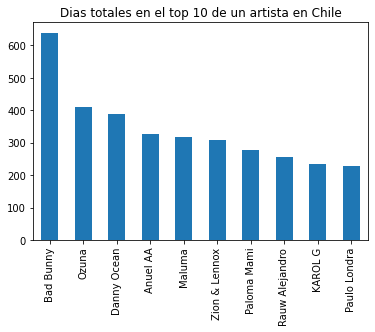

In [ ]:
top10ChileArtistas = topChileArtistas['artist'].value_counts().head(10)
top10ChileArtistas.plot.bar(title='Dias totales en el top 10 de un artista en Chile')
plt.show()

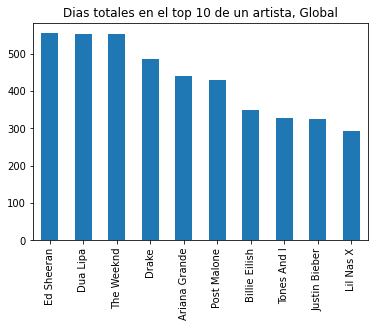

In [ ]:
top10GlobalArtistas = topGlobalArtistas['artist'].value_counts().head(10)
top10GlobalArtistas.plot.bar(title='Dias totales en el top 10 de un artista, Global')
plt.show()

Se hizo una limpieza del dataset original, generando dos DataFrames conteniendo el top 10 a nivel global y a nivel chile, teniendo como columnas artistas y fechas. Se realiza un drop_duplicates() para eliminar aquellos artistas que aparecieran más de una vez un mismo día (más de una canción).

De las últimas dos celdas es posible ver cuáles son los artistas que más se repiten dentro de los top 10 en Chile son Bad Bunny, el cual ha estado dentro del top 10 700 días desde el primero de marzo de 2017 hasta el 30 de septiembre de 2021, lo cual corresponde a casi dos años de permanecer en el top. Con un número menor de días, pero siendo igualmente una cantidad considerable, lo sigue Ozuna estando 411 días en el top. Por último, con menos de 400 días en el top se encuentran Danny Ocean, Anuel AA y Maluma. Los artistas mencionados son conocidos por realizar canciones de música latina urbana, lo que nos llevaría a pensar que en chile se tiene una tendencia a escuchar este tipo de música.

Realizando un análisis similar al anterior, es posible ver que a nivel global quien ocupa el primer puesto manteniéndose por mayor cantidad de tiempo dentro del top 10 se lo lleva el galardonado cantante británico Ed Sheeran con 615 días desde el primero de marzo de 2017 al 30 de septiembre de 2021. Debajo de los 600 días se encuentran Dua Lipa, The Weeknd y Drake, teniendo a Dua Lipa con un día más que The Weeknd. Por último en el quinto lugar se encuentra Ariana Grande con 440 días. Es posible notar una tendencia en músicos populares de habla inglesa dentro del top 5 con artistas más escuchados a nivel global.

### Artistas en top 200 con una canción


Se seguirá un procedimiento similar al anterior, pero esta vez considerando canción por canción.

In [ ]:
topChileArtCanciones = topChile[['date', 'artist', 'title']]
topGlobalArtCanciones = topGlobal[['date', 'artist', 'title']]

In [ ]:
topChileArtCanciones = topChileArtCanciones.sort_values(by='date')
topGlobalArtCanciones = topGlobalArtCanciones.sort_values(by='date')

In [ ]:
print(topChileArtCanciones.size, topGlobalArtCanciones.size)
topChileArtCanciones = topChileArtCanciones.drop_duplicates()
topGlobalArtCanciones = topGlobalArtCanciones.drop_duplicates()
print(topChileArtCanciones.size, topGlobalArtCanciones.size)

1274442 1271121
1150599 1184208


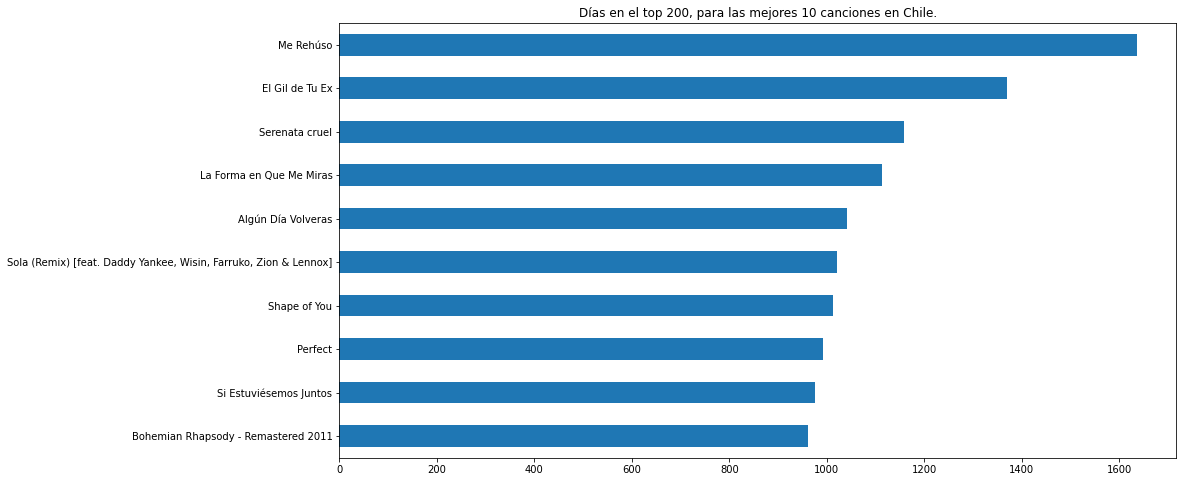

In [ ]:
top10ChileCanciones = topChileArtCanciones['title'].value_counts().head(10)
top10ChileCanciones.plot.barh(title='Días en el top 200, para las mejores 10 canciones en Chile.', figsize=(15,8)).invert_yaxis()
plt.show()

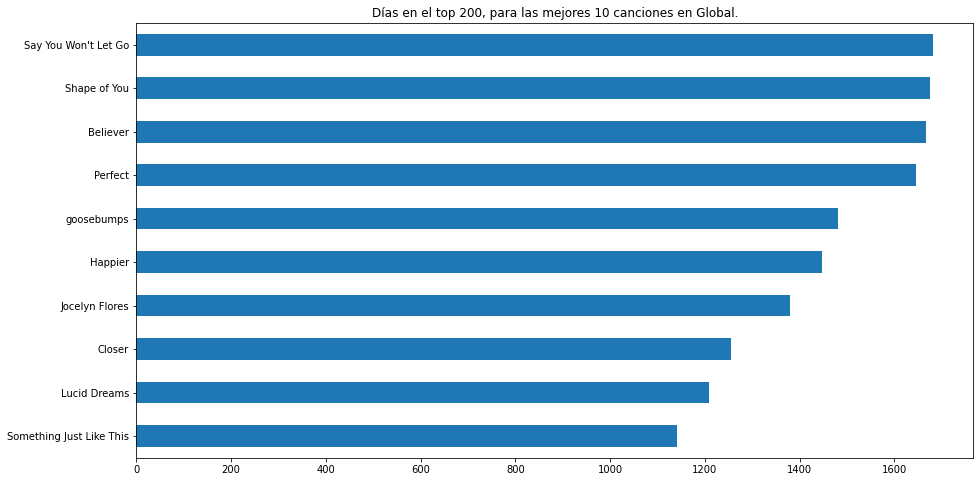

In [ ]:
top10GlobalCanciones = topGlobalArtCanciones['title'].value_counts().head(10)
top10GlobalCanciones.plot.barh(title='Días en el top 200, para las mejores 10 canciones en Global.', figsize=(15,8)).invert_yaxis()
plt.show()

In [ ]:
songs_chile = ['Me Rehúso', 'El Gil de Tu Ex', 'La Forma en Que Me Miras', 'Serenata cruel','Algún Día Volveras']
songs_global = ['Shape of You', "Say You Won't Let Go", 'Believer', 'Perfect', 'goosebumps']

artist_per_song_chile = {}
artist_per_song_global = {}

for song in songs_chile:
  if song not in artist_per_song_chile:
    artist_per_song_chile[song] = topChileArtCanciones[topChileArtCanciones['title']==song][['artist', 'date']]
  
for song in songs_global:
  if song not in artist_per_song_global:
    artist_per_song_global[song] = topGlobalArtCanciones[topGlobalArtCanciones['title']==song][['artist', 'date']]

In [ ]:
for key in artist_per_song_chile:
  print(key, artist_per_song_chile[key].iloc[0])

for key in artist_per_song_global:
  print(key, artist_per_song_global[key].iloc[0])

Me Rehúso artist    Danny Ocean
date       2017-01-26
Name: 18170155, dtype: object
El Gil de Tu Ex artist    Santaferia
date      2017-07-31
Name: 20191778, dtype: object
La Forma en Que Me Miras artist    Super Yei, Sammy, Myke Towers, Lenny Tavárez, ...
date                                             2018-08-12
Name: 4851518, dtype: object
Serenata cruel artist    Villa Cariño
date        2017-01-01
Name: 188806, dtype: object
Algún Día Volveras artist    Santaferia
date      2018-07-20
Name: 5144997, dtype: object
Shape of You artist    Ed Sheeran
date      2017-01-06
Name: 523272, dtype: object
Say You Won't Let Go artist    James Arthur
date        2017-01-01
Name: 206691, dtype: object
Believer artist    Imagine Dragons
date           2017-02-02
Name: 67268, dtype: object
Perfect artist    Ed Sheeran
date      2017-03-03
Name: 21910, dtype: object
goosebumps artist    Travis Scott
date        2017-01-01
Name: 206848, dtype: object


De las últimas celdas se puede ver que las cinco canciones que más han perdurado en el top 200 -independiente de la posición- en la región chilena son:

- Me Rehúso, artista: Danny Ocean.
- El Gil de Tu Ex, artista: Santaferia.
- La Forma en Que Me Miras, artista: Super Yei, Myke Towers, Lenny Tavárez, Rafa Pabön.
- Serenata Cruel, artista: Villa Cariño.
- Algún Día Volverás, artista: Santaferia.

Es posible notar que la banda chilena de cumbia Santaferia se posiciona con dos canciones dentro de las 5 primeras que más se han mantenido dentro del top 200, acompañados de otra banda del mismo ámbito musical, Villa Cariño. Los otros dos artistas son extranjeros, principalmente de música latina urbana.

De los resultados anteriormente mostrados se pueden concluir bastantes cosas, como por ejemplo los artistas que más perduraro dentro del top 10 varían con aquellos que se han mantenido con una canción, pero que se ve una tendencia al mismo estilo musical que se estudió anteriormente.

Realizando un análisis similar pero a nivel global es posible ver que las cinco canciones que predominan en el top 200 son: 

- Shape of You, artista: Ed Sheeran.
- Say You Won't Let Go, artista: James Arthur.
- Believer, artista: Imagine Dragons.
- Perfect, artista: Ed Sheeran.
- goosebumps, artista: Travis Scott.

En este caso también se puede ver que se repite un artista, Ed Sheeran, que es aquel quien obtuvo por mayor cantidad de tiempo alguna canción dentro del top 10, hecho que se ve reflejado en las canciones que se mantuvieron dentro del top 200. A él lo acompañan distintos artistas masculinos de habla inglesa, James Arthur, Imagine Dragons y Travis Scott.

En términos de artista, Ed Sheeran se mantuvo con el podio de presencia en el top 200 y artistas de habla inglesa se mantienen como preferidos a nivel global, con la gran diferencia que para el top 200 entra el rapero Travis Scott.

Con este mismo análisis se puede ver qué canciones son aquellas que se han mantenido por la mayor cantidad de tiempo dentro del top 200, pero se hará un análisis separado sobre qué canciones se considerarían como aquellas que perduran más que los éxitos en promedio.

## ¿Qué canciones han perdurado por una mayor cantidad de tiempo?

Tomaremos el top 10 de Chile y se calculará un promedio de cuánto tiempo se mantiene cada canción en el top. A partir de esto veremos qué canciones en particular se alejan de este promedio.

In [ ]:
topChile = topTotal[topTotal['region'] == 'Chile']
top10Chile = topChile[topChile['rank'] <= 10]

In [ ]:
top10Chile['date']=pd.to_datetime(top10Chile['date'].astype(str), format='%Y/%m/%d')

In [ ]:
top10Chile.sort_values(by='date')

In [ ]:
top10Chile = top10Chile[['date', 'artist', 'title']]

In [ ]:
days_per_song = top10Chile['title'].value_counts()

In [ ]:
days_per_song.mean()

24.72030920590302

Aquí podemos ver que la cantidad de días promedio que se mantiene una canción dentro del top 10 es de 24.7 días

In [ ]:
days_per_song.std()

45.03737066062439

En este resultado se puede notar que la variación es bastante alta, de 45 días, con lo que podemos concluir que hay canciones que se "escapan" fuertemente de este promedio. Veamos cuántas canciones están por al menos 30 días en el top.

In [ ]:
days = days_per_song.to_frame("days")
days

In [ ]:
days_30 = days[days["days"]>=30]
days_30.size

273

Acá podemos ver que existen 273 canciones que están por sobre 30 días dentro del top 10. Veamos un caso más extremo, cuántas canciones están por lo menos 6 meses dentro del top.

In [ ]:
days_6months = days[days["days"]>=182]
days_6months.size

32

Existen 32 canciones que han pasado al menos seis meses dentro del top 10. En este punto ya se puede concluir que estos temas han pasado un tiempo considerable dentro del top, pudiendo considerarlas como aquellas que se han escuchado a más no poder. Las primeras 5 canciones que ocupan este puesto son las siguientes:

In [ ]:
days_6months.head()

,days
Me Rehúso,353
Te Boté - Remix,274
No Me Conoce - Remix,258
La player (Bandolera),253
Cuando Te Besé,248


- Me Rehúso
- Te Boté -Remix
- No Me Conoce - Remix
- La player (Bandolera)
- Cuando Te Besé

## Preguntas y problemas relacionadas al Genero



### Trabajo con DataSet nuevo y implementacion de un Clasificador

Primero se trabajo con el mismo dataframe creado para una pregunta anterior, donde tenemos cada cancion de Chile 2021, con sus respectivas features. Como se menciono en el Hito2, las preguntas relacionadas al Genero son de caracter predictivo, por lo tanto, se penso en un clasificador. En este caso logramos obtener el genero musical asociado a un artista a traves de la API de spotify. Esto parece no ser la mejor opcion, ya que un artista asociado a un genero no significa que todas sus canciones sean de dicho genero. 

Se realizo un join segun la columna artista y artist para tener las canciones relacionadas a un genero, notamos que tenia muchos valores NaN asi que los eliminamos, generamos una clase distinta para cada genero, y notamos que estaban muy desbalanceadas lo que genero problemas con las metricas ya que no parecian muy razonables. Para solucionar esto hicimos subsampling en la clase mayoritaria, pero aun asi las metricas no parecian razonables. 

Pensamos que estos problemas pueden ser generados porque son muchas clases(una para cada genero) , estan desbalanceadas o porque no se escogió el mejor clasificador. Si tuvieramos mas tiempo, se probarían con otros clasificadores, subsampling o oversampling, se podria modificar el dataset para eliminar algunas clases sobrantes.

No obstante este clasificador se podria aplicar para predecir genero por año y asi ver cuales se repiten mas o menos por año y responder la pregunta si ¿Es posible predecir si un género será más/menos popular cada año? , pero los resultados pueden no ser muy confiables. 




In [ ]:

import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
chileFeatures2020 = pd.read_csv('/content/drive/MyDrive/spotify-charts-features.csv')
topChileDf = pd.read_csv('/content/drive/MyDrive/topChile.csv')
new = topChileDf["url"].str.split("track/", n = 1, expand = True)
topChileDf["trackID"] = new[1]
# 2021 es hasta septiembre
chile2021df = topChileDf[topChileDf["date"]>="2021"]
dataframeChile2021Completo = pd.merge(chileFeatures2020, chile2021df, left_on="id", right_on="trackID")
dataframeChile2021Completo = dataframeChile2021Completo.dropna(how='any')

In [ ]:
dataframeChile2021Completo.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,title,rank,date,artist,streams,url,trackID
0,0.801,0.745,6,-3.733,0,0.063,0.398,0.00603,0.153,0.245,104.965,audio_features,3JHpk0DOTOzyh0777JFAky,spotify:track:3JHpk0DOTOzyh0777JFAky,https://api.spotify.com/v1/tracks/3JHpk0DOTOzy...,https://api.spotify.com/v1/audio-analysis/3JHp...,214013,4,Diosa,191,2021-01-01,Myke Towers,35986.0,https://open.spotify.com/track/3JHpk0DOTOzyh07...,3JHpk0DOTOzyh0777JFAky
1,0.801,0.745,6,-3.733,0,0.063,0.398,0.00603,0.153,0.245,104.965,audio_features,3JHpk0DOTOzyh0777JFAky,spotify:track:3JHpk0DOTOzyh0777JFAky,https://api.spotify.com/v1/tracks/3JHpk0DOTOzy...,https://api.spotify.com/v1/audio-analysis/3JHp...,214013,4,Diosa,95,2021-01-02,Myke Towers,35872.0,https://open.spotify.com/track/3JHpk0DOTOzyh07...,3JHpk0DOTOzyh0777JFAky
2,0.801,0.745,6,-3.733,0,0.063,0.398,0.00603,0.153,0.245,104.965,audio_features,3JHpk0DOTOzyh0777JFAky,spotify:track:3JHpk0DOTOzyh0777JFAky,https://api.spotify.com/v1/tracks/3JHpk0DOTOzy...,https://api.spotify.com/v1/audio-analysis/3JHp...,214013,4,Diosa,94,2021-01-03,Myke Towers,36415.0,https://open.spotify.com/track/3JHpk0DOTOzyh07...,3JHpk0DOTOzyh0777JFAky
3,0.801,0.745,6,-3.733,0,0.063,0.398,0.00603,0.153,0.245,104.965,audio_features,3JHpk0DOTOzyh0777JFAky,spotify:track:3JHpk0DOTOzyh0777JFAky,https://api.spotify.com/v1/tracks/3JHpk0DOTOzy...,https://api.spotify.com/v1/audio-analysis/3JHp...,214013,4,Diosa,103,2021-02-01,Myke Towers,37062.0,https://open.spotify.com/track/3JHpk0DOTOzyh07...,3JHpk0DOTOzyh0777JFAky
4,0.801,0.745,6,-3.733,0,0.063,0.398,0.00603,0.153,0.245,104.965,audio_features,3JHpk0DOTOzyh0777JFAky,spotify:track:3JHpk0DOTOzyh0777JFAky,https://api.spotify.com/v1/tracks/3JHpk0DOTOzy...,https://api.spotify.com/v1/audio-analysis/3JHp...,214013,4,Diosa,102,2021-02-02,Myke Towers,37874.0,https://open.spotify.com/track/3JHpk0DOTOzyh07...,3JHpk0DOTOzyh0777JFAky


In [ ]:
#Borramos las columnas que no sirven
ta = dataframeChile2021Completo.drop(columns=["type","key", "id", "mode", "uri", "track_href","date", "analysis_url", "time_signature", "url", "trackID", "duration_ms", "streams"])

In [ ]:
ta.head()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,title,rank,artist
0,0.801,0.745,-3.733,0.063,0.398,0.00603,0.153,0.245,104.965,Diosa,191,Myke Towers
1,0.801,0.745,-3.733,0.063,0.398,0.00603,0.153,0.245,104.965,Diosa,95,Myke Towers
2,0.801,0.745,-3.733,0.063,0.398,0.00603,0.153,0.245,104.965,Diosa,94,Myke Towers
3,0.801,0.745,-3.733,0.063,0.398,0.00603,0.153,0.245,104.965,Diosa,103,Myke Towers
4,0.801,0.745,-3.733,0.063,0.398,0.00603,0.153,0.245,104.965,Diosa,102,Myke Towers


In [ ]:
#Hacemos un join con el csv de los generos
generos = pd.read_csv('/content/drive/MyDrive/generosArtistas.csv')
join = pd.merge(generos, ta, left_on="artista", right_on="artist")

In [ ]:
#Borramos la columna de artista que esta repetida
join = join.drop(columns=["artist"])

In [ ]:
join.head()

,artista,genero,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,title,rank
0,Danny Ocean,latin,0.744,0.804,-6.327,0.0677,0.0231,0.0,0.0494,0.426,104.823,Me Rehúso,168
1,Danny Ocean,latin,0.744,0.804,-6.327,0.0677,0.0231,0.0,0.0494,0.426,104.823,Me Rehúso,162
2,Danny Ocean,latin,0.744,0.804,-6.327,0.0677,0.0231,0.0,0.0494,0.426,104.823,Me Rehúso,180
3,Danny Ocean,latin,0.744,0.804,-6.327,0.0677,0.0231,0.0,0.0494,0.426,104.823,Me Rehúso,179
4,Danny Ocean,latin,0.744,0.804,-6.327,0.0677,0.0231,0.0,0.0494,0.426,104.823,Me Rehúso,179


In [ ]:
#Revisamos los NaN
join.isna().sum()

artista                   0
genero              4162258
danceability              0
energy                    0
loudness                  0
speechiness               0
acousticness              0
instrumentalness          0
liveness                  0
valence                   0
tempo                     0
title                     0
rank                      0
dtype: int64

In [ ]:
#Eliminamos los Nan
join.dropna(subset = ["genero"], inplace=True)

In [ ]:
#Comprobamos que se borraron
join.isna().sum()

artista             0
genero              0
danceability        0
energy              0
loudness            0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
title               0
rank                0
dtype: int64

In [ ]:
join.head()

,artista,genero,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,title,rank
0,Danny Ocean,latin,0.744,0.804,-6.327,0.0677,0.0231,0.0,0.0494,0.426,104.823,Me Rehúso,168
1,Danny Ocean,latin,0.744,0.804,-6.327,0.0677,0.0231,0.0,0.0494,0.426,104.823,Me Rehúso,162
2,Danny Ocean,latin,0.744,0.804,-6.327,0.0677,0.0231,0.0,0.0494,0.426,104.823,Me Rehúso,180
3,Danny Ocean,latin,0.744,0.804,-6.327,0.0677,0.0231,0.0,0.0494,0.426,104.823,Me Rehúso,179
4,Danny Ocean,latin,0.744,0.804,-6.327,0.0677,0.0231,0.0,0.0494,0.426,104.823,Me Rehúso,179


In [ ]:
#Borramos las columnas con palabras, porque no dejan usar el clasificador
join = join.drop(columns=["title","rank"])

In [ ]:
join.head()

,artista,genero,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,Danny Ocean,latin,0.744,0.804,-6.327,0.0677,0.0231,0.0,0.0494,0.426,104.823
1,Danny Ocean,latin,0.744,0.804,-6.327,0.0677,0.0231,0.0,0.0494,0.426,104.823
2,Danny Ocean,latin,0.744,0.804,-6.327,0.0677,0.0231,0.0,0.0494,0.426,104.823
3,Danny Ocean,latin,0.744,0.804,-6.327,0.0677,0.0231,0.0,0.0494,0.426,104.823
4,Danny Ocean,latin,0.744,0.804,-6.327,0.0677,0.0231,0.0,0.0494,0.426,104.823


In [ ]:
join.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3419498 entries, 0 to 7581458
Data columns (total 11 columns):
 #   Column            Dtype  
---  ------            -----  
 0   artista           object 
 1   genero            object 
 2   danceability      float64
 3   energy            float64
 4   loudness          float64
 5   speechiness       float64
 6   acousticness      float64
 7   instrumentalness  float64
 8   liveness          float64
 9   valence           float64
 10  tempo             float64
dtypes: float64(9), object(2)
memory usage: 313.1+ MB


In [ ]:
#Vemos que las clases estan desbalanceadas y tienen generos con muy pocas canciones
join["genero"].value_counts()

latin                  1353923
dance pop               325754
trap latino             312297
pop                     249940
puerto rican pop        182706
                        ...   
nyc rap                      1
beatlesque                   1
cumbia sonidera              1
gruperas inmortales          1
hip hop                      1
Name: genero, Length: 65, dtype: int64

In [ ]:
join.corr()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
danceability,1.000000,0.198011,0.312868,0.199528,-0.244819,0.037277,-0.124371,0.468436,-0.225479
energy,0.198011,1.000000,0.627784,-0.072313,-0.519159,-0.040783,0.054207,0.329553,-0.037152
loudness,0.312868,0.627784,1.000000,-0.058174,-0.357210,-0.143787,-0.030581,0.292779,-0.009646
speechiness,0.199528,-0.072313,-0.058174,1.000000,-0.002957,0.003308,0.078970,0.136545,0.261826
acousticness,-0.244819,-0.519159,-0.357210,-0.002957,1.000000,-0.070605,0.005533,-0.250444,0.070064
instrumentalness,0.037277,-0.040783,-0.143787,0.003308,-0.070605,1.000000,-0.023085,0.028317,0.001530
liveness,-0.124371,0.054207,-0.030581,0.078970,0.005533,-0.023085,1.000000,-0.031781,-0.061666
valence,0.468436,0.329553,0.292779,0.136545,-0.250444,0.028317,-0.031781,1.000000,-0.047814
tempo,-0.225479,-0.037152,-0.009646,0.261826,0.070064,0.001530,-0.061666,-0.047814,1.000000


In [ ]:
#import matplotlib.pyplot as plt
#from sklearn import preprocessing

#%matplotlib inline

In [ ]:
#plt.style.use('ggplot')
#join["genero"].hist()

In [ ]:
#Clases desbalanceadas
from sklearn.model_selection import train_test_split

join["genero"].value_counts()

latin                  1353923
dance pop               325754
trap latino             312297
pop                     249940
puerto rican pop        182706
                        ...   
nyc rap                      1
beatlesque                   1
cumbia sonidera              1
gruperas inmortales          1
hip hop                      1
Name: genero, Length: 65, dtype: int64

In [ ]:
arrayGeneros = join['genero'].unique()

In [ ]:
print(arrayGeneros)
df = pd.DataFrame(arrayGeneros)

['latin' 'pop' 'boy band' 'dance pop' 'colombian pop' 'modern rock'
 'chilean rock' 'australian dance' 'canadian pop'
 'canadian contemporary r&b' 'art pop' 'cumbia chilena' 'beatlesque'
 'argentine rock' 'chicha' 'banda' 'contemporary country' 'classic rock'
 'k-pop' 'album rock' 'argentine hip hop' 'bachata' 'dominican pop'
 'cumbia sonidera' 'bolero' 'latin pop' 'chicago rap' 'trap latino'
 'lgbtq+ hip hop' 'puerto rican pop' 'australian pop' 'basshall'
 'gruperas inmortales' 'salsa' 'trap chileno' 'melodic rap' 'cubaton'
 'bedroom pop' 'rap chileno' 'cali rap' 'trap venezolano' 'panamanian pop'
 'tropical' 'cha-cha-cha' 'corrido' 'modern alternative rock'
 'mexican indie' 'reggaeton' 'italian hip hop' 'big room' 'dutch pop'
 'australian hip hop' 'indie triste' 'perreo' 'ambient' 'glam metal'
 'reggaeton chileno' 'electro' 'dreamo' 'nyc rap' 'indie rock italiano'
 'concurso de talentos argentino' 'pop argentino' 'alternative hip hop'
 'hip hop']


In [ ]:
df

,0
0,latin
1,pop
2,boy band
3,dance pop
4,colombian pop
...,...
60,indie rock italiano
61,concurso de talentos argentino
62,pop argentino
63,alternative hip hop


In [ ]:
df.columns = ['generoZ']

In [ ]:
df

,generoZ
0,latin
1,pop
2,boy band
3,dance pop
4,colombian pop
...,...
60,indie rock italiano
61,concurso de talentos argentino
62,pop argentino
63,alternative hip hop


In [ ]:
#len(df)


X, y = df , range(len(df))

In [ ]:
#X

In [ ]:
#list(y)
df["Class"] = list(y)

In [ ]:
df

,generoZ,Class
0,latin,0
1,pop,1
2,boy band,2
3,dance pop,3
4,colombian pop,4
...,...,...
60,indie rock italiano,60
61,concurso de talentos argentino,61
62,pop argentino,62
63,alternative hip hop,63


In [ ]:
#Hacemos un join para tener las clases como numeros para poder usar los metodos y funciones de las librerias
Testing = pd.merge(df,join,left_on="generoZ",right_on="genero")

In [ ]:
#Comprobamos que esta asociado un numero al nombre de la clase que es el genero
Testing.head()

,generoZ,Class,artista,genero,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,latin,0,Danny Ocean,latin,0.744,0.804,-6.327,0.0677,0.0231,0.0,0.0494,0.426,104.823
1,latin,0,Danny Ocean,latin,0.744,0.804,-6.327,0.0677,0.0231,0.0,0.0494,0.426,104.823
2,latin,0,Danny Ocean,latin,0.744,0.804,-6.327,0.0677,0.0231,0.0,0.0494,0.426,104.823
3,latin,0,Danny Ocean,latin,0.744,0.804,-6.327,0.0677,0.0231,0.0,0.0494,0.426,104.823
4,latin,0,Danny Ocean,latin,0.744,0.804,-6.327,0.0677,0.0231,0.0,0.0494,0.426,104.823


In [ ]:
Testing = Testing.drop(columns=['generoZ'])

In [ ]:
Testing.head()

,Class,artista,genero,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0,Danny Ocean,latin,0.744,0.804,-6.327,0.0677,0.0231,0.0,0.0494,0.426,104.823
1,0,Danny Ocean,latin,0.744,0.804,-6.327,0.0677,0.0231,0.0,0.0494,0.426,104.823
2,0,Danny Ocean,latin,0.744,0.804,-6.327,0.0677,0.0231,0.0,0.0494,0.426,104.823
3,0,Danny Ocean,latin,0.744,0.804,-6.327,0.0677,0.0231,0.0,0.0494,0.426,104.823
4,0,Danny Ocean,latin,0.744,0.804,-6.327,0.0677,0.0231,0.0,0.0494,0.426,104.823


In [ ]:
#Borramos las columnas con palabras
Testing = Testing.drop(columns=["artista","genero"])

In [ ]:
print("Distribucion de clases original")
Testing['Class'].value_counts()

Distribucion de clases original


0     1353923
3      325754
27     312297
1      249940
29     182706
       ...   
41          1
43          1
44          1
59          1
32          1
Name: Class, Length: 65, dtype: int64

In [ ]:
Testing.head()

,Class,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0,0.744,0.804,-6.327,0.0677,0.0231,0.0,0.0494,0.426,104.823
1,0,0.744,0.804,-6.327,0.0677,0.0231,0.0,0.0494,0.426,104.823
2,0,0.744,0.804,-6.327,0.0677,0.0231,0.0,0.0494,0.426,104.823
3,0,0.744,0.804,-6.327,0.0677,0.0231,0.0,0.0494,0.426,104.823
4,0,0.744,0.804,-6.327,0.0677,0.0231,0.0,0.0494,0.426,104.823


In [ ]:
Testing['Class'].value_counts()

0     1353923
3      325754
27     312297
1      249940
29     182706
       ...   
41          1
43          1
44          1
59          1
32          1
Name: Class, Length: 65, dtype: int64

In [ ]:
counts = Testing['Class'].value_counts()

In [ ]:
#eliminamos las clases que tienen menos de 3 canciones
res = Testing[~Testing['Class'].isin(counts[counts < 3].index)]

In [ ]:
res['Class'].value_counts()

0     1353923
3      325754
27     312297
1      249940
29     182706
4      179019
9      137649
17      60581
19      58708
21      58566
18      55464
34      46357
11      38684
8       37553
56      36365
30      32761
36      30625
25      28653
28      26752
60      22742
2       21701
50      20710
10      15242
45      13689
61      11618
58       8928
51       8484
49       5929
7        5776
31       4624
15       4495
40       4327
24       3240
20       3000
13       2906
38       2764
47       1628
46       1369
62        971
39        676
6         507
35        441
53        380
63        261
37        196
54        174
14        154
55        105
52         25
5          18
48         18
26         13
57         13
22          3
42          3
Name: Class, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
data_train, data_test, ytrain, ytest = train_test_split(res, res['Class'], test_size=0.3, stratify=res['Class'])
 #proporción de clases en el train después de dividir en train-test
ytrain.value_counts()

0     947746
3     228028
27    218608
1     174958
29    127894
4     125313
9      96354
17     42407
19     41096
21     40996
18     38825
34     32450
11     27079
8      26287
56     25455
30     22933
36     21437
25     20057
28     18726
60     15919
2      15191
50     14497
10     10669
45      9582
61      8133
58      6250
51      5939
49      4150
7       4043
31      3237
15      3146
40      3029
24      2268
20      2100
13      2034
38      1935
47      1140
46       958
62       680
39       473
6        355
35       309
53       266
63       183
37       137
54       122
14       108
55        73
52        17
5         13
48        13
26         9
57         9
22         2
42         2
Name: Class, dtype: int64

In [ ]:
import numpy as np



print("Distribución de clases usando (over/sub) sampling")
print()

data_train = data_train.reset_index(drop=True)

# subsampling sobre la clase 0
idx = np.random.choice(data_train.loc[data_train.Class == 0].index, size=700000, replace=False)
data_subsampled = data_train.drop(data_train.iloc[idx].index)
#print("Data subsampled on class '0'")
#print(data_subsampled['Class'].value_counts())




Distribución de clases usando (over/sub) sampling



In [ ]:
data_subsampled.head()

,Class,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,29,0.721,0.637,-5.134,0.2860,0.0406,0.000000,0.0525,0.691,193.922
1,27,0.767,0.592,-8.047,0.4830,0.3830,0.000000,0.2940,0.612,93.368
2,0,0.725,0.756,-5.013,0.0572,0.3620,0.000685,0.1030,0.828,100.070
3,3,0.793,0.793,-4.521,0.0830,0.0123,0.000000,0.0951,0.679,123.950
5,29,0.699,0.612,-4.355,0.0667,0.7570,0.000000,0.1610,0.591,100.005


In [ ]:
# datos test (mismo para todos los conjuntos de entrenamiento)
X_test = data_test[data_train.columns[1:]] # todo despues de la primera columna
y_test = data_test[data_train.columns[0]]  # la primera columna donde estan las clases

X_subs = data_subsampled[data_train.columns[1:]]
y_subs = data_subsampled[data_train.columns[0]]

In [ ]:
X_subs.head()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.721,0.637,-5.134,0.2860,0.0406,0.000000,0.0525,0.691,193.922
1,0.767,0.592,-8.047,0.4830,0.3830,0.000000,0.2940,0.612,93.368
2,0.725,0.756,-5.013,0.0572,0.3620,0.000685,0.1030,0.828,100.070
3,0.793,0.793,-4.521,0.0830,0.0123,0.000000,0.0951,0.679,123.950
5,0.699,0.612,-4.355,0.0667,0.7570,0.000000,0.1610,0.591,100.005


In [ ]:
y_subs

0          29
1          27
2           0
3           3
5          29
           ..
2393630    29
2393631     1
2393633     4
2393635     9
2393637     3
Name: Class, Length: 1693640, dtype: int64

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
print("SUBSAMPLING::::::::::")
clf_subs = DecisionTreeClassifier()
clf_subs.fit(X_subs, y_subs)
pred_subs = clf_subs.predict(X_test)
print(classification_report(y_test, pred_subs))

SUBSAMPLING::::::::::


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00    406177
           1       1.00      1.00      1.00     74982
           2       1.00      1.00      1.00      6510
           3       1.00      1.00      1.00     97726
           4       1.00      1.00      1.00     53706
           5       1.00      1.00      1.00         5
           6       0.99      0.95      0.97       152
           7       1.00      1.00      1.00      1733
           8       1.00      1.00      1.00     11266
           9       1.00      1.00      1.00     41295
          10       1.00      1.00      1.00      4573
          11       1.00      1.00      1.00     11605
          13       1.00      1.00      1.00       872
          14       0.94      0.98      0.96        46
          15       1.00      1.00      1.00      1349
          17       1.00      1.00      1.00     18174
          18       1.00      1.00      1.00     16639
          19       1.00    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Contribuciones

Valeria respondió pregunta sobre qué artistas han perdurado en el top 200 y qué canciones han perdurado por una mayor cantidad de tiempo.

Sebastián hizo la correccion sobre el clasificador e implementó el clustering de las (correccion de pregunta 1 y desarrollo  de la pregunta 2).

Joaquín desarrollo el experimento con los generos extraidos de la api de Spotify segun el artista , para responder las preguntas relacionadas al género.

Esteban participó en la creación de la presentación, la creación de algunos gráficos y la edición del video.

Tomás también participo en la creacion de la presentación.


